# Appendix A: Misspecifications in Kernels

In section 3 of the paper, we claim that the variance estimate with covariance is sensitive to a correct specification of a kernel for GPs. 

We will provide empirical evidence for this claim. We assume that our objective function is represented by a Gaussian process with a kernel. Then, we approximate this objective function by 

* a Gaussian process with the same kernel as the objective function (correctly specified)
* a Gaussian process with another kernel (misspecified)

In both cases, we measure the two variance estimates: 

$$
    \hat s_S^2(\lambda_S) = \frac{1}{n^2} {1}^\top {\hat K}\left(\lambda_S\right) ~ {1} \qquad \text{(With Covariances)}
$$

$$
    \hat s_S^2(\lambda_S) = \frac{1}{n} \sum\nolimits_{i = 1}^n {\hat K}\left(\lambda_S\right)_{i,i} \qquad \text{(Covariances omitted)}
$$


## Packages and Scripts

In [8]:
library(ParamHelpers)
library(mlrMBO)
library(smoof)
library(BBmisc)
library(iml)
library(ggplot2)
library(data.table)
# library(ggpubr)

# theme_set(theme_p())

library(data.table)

source("../R/marginal_effect.R")
source("simulate_kernel_misspecification.R")

## Definition of the Experiment

The following function simulates a Gaussian process approximation to the Styblinski-Tang function with a *true* kernel. This GP gives us the *true* objective. 

Then, we approximate this objective by another GP that is correctly specified (*true* kernel), and once with a *wrong* kernel. 

We compute the PDPs, and compute the log-likelihood of the *true* objective under the two different approximations.

We repeat the experiment 50 times for different dimensions 3, 5, 8. 

In [22]:
out = lapply(c(3, 5, 8), function(dim) {
    res = lapply(seq_len(30), function(i) {
        res = simulate_kernel_misspecification(dimension = 5, true_kernel = "matern3_2", wrong_kernel = "matern5_2", n = 30)
        res$iter = i
    
        res
    })
    
    do.call(rbind, res)
})

In [19]:
df = do.call(rbind, out_2)


In [20]:
df

x1,mean,sd,type,neg_loglik,mean.gt,misspec,dimension,iter
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<int>
-4.8872019,-12.535305,28.728133,pdp_var_gp,4.276815,-12.536513,FALSE,3,1
-4.3682039,-35.205755,13.807738,pdp_var_gp,3.544168,-35.206196,FALSE,3,1
-3.8492060,-62.467512,16.175087,pdp_var_gp,3.702411,-62.466948,FALSE,3,1
-3.3302081,-71.080037,19.297845,pdp_var_gp,3.878932,-71.079873,FALSE,3,1
-2.8112102,-73.219061,8.618389,pdp_var_gp,3.072837,-73.218927,FALSE,3,1
-2.2922123,-68.447576,12.064879,pdp_var_gp,3.409237,-68.447321,FALSE,3,1
-1.7732143,-54.275198,13.846778,pdp_var_gp,3.546991,-54.275724,FALSE,3,1
-1.2542164,-51.206872,10.258246,pdp_var_gp,3.247020,-51.206785,FALSE,3,1
-0.7352185,-44.090152,14.179357,pdp_var_gp,3.570726,-44.090118,FALSE,3,1


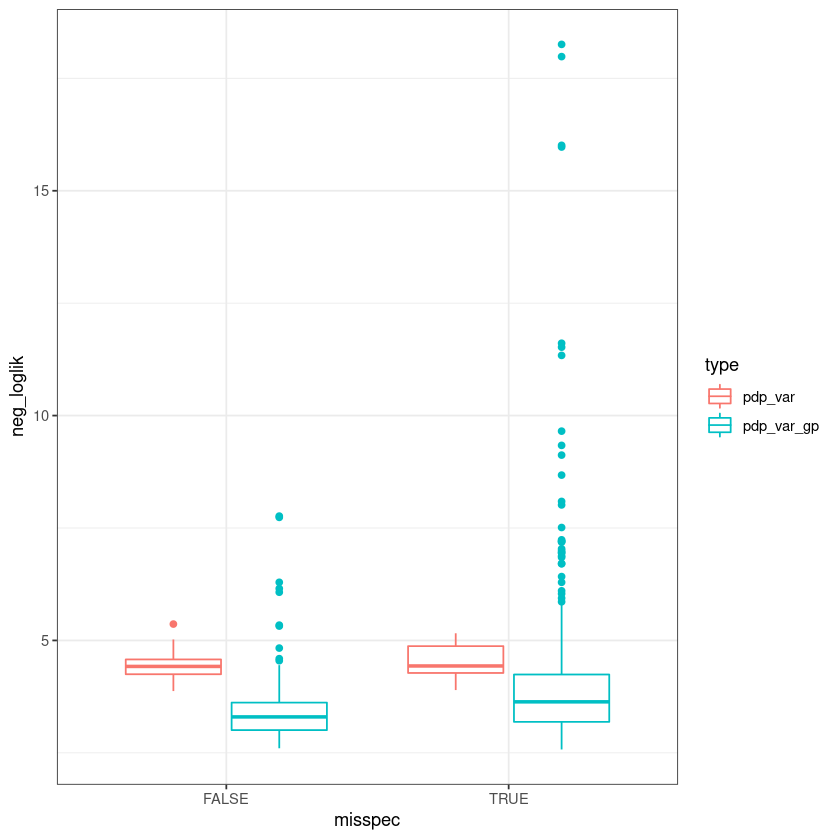

In [21]:
p = ggplot(data = df, aes(x = misspec, y = neg_loglik, colour = type)) + geom_boxplot() #+ ylim(c(0, 50))
p

In [58]:
# Create a Table 
bla_2_s = setDT(bla_2)[, .(mean(neg_loglik), sd(neg_loglik)), by = c("misspec", "type", "dimension")]

In [59]:
bla_2_s$variant = paste0(bla_2_s$type, "_", bla_2_s$misspec)
bla_2_s$value = paste0(round(bla_2_s$V1, 2), " (", round(bla_2_s$V2, 2), ")")

In [60]:
reshape2::dcast(bla_2_s, formula = dimension ~ variant, value.var = "value")

dimension,pdp_var_FALSE,pdp_var_gp_FALSE,pdp_var_gp_TRUE,pdp_var_TRUE
<dbl>,<chr>,<chr>,<chr>,<chr>
2,3.15 (0.38),2.51 (0.49),2.34 (1.36),2.64 (0.76)


In [65]:
out_5 = lapply(seq_len(50), function(i) {
        res = simulate_kernel(dimension = 5, true_kernel = "matern3_2", wrong_kernel = "matern5_2", n = 30)
        res$iter = i
    
        res
})


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  18.7852 19.22764 18.60986 18.74395 18.76872 
  - best initial criterion value(s) :  -164.3145 

N = 5, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       164.31  |proj g|=       0.4809
At iterate     1  f =       164.19  |proj g|=       0.63186
At iterate     2  f =       164.09  |proj g|=       0.66249
At iterate     3  f =       163.95  |proj g|=       0.22444
At iterate     4  f =       163.78  |proj g|=       0.16338
At iterate     5  f =       163.61  |proj g|=       0.23253
At iterate     6  f =       163.54  |proj g|=        0.6765
At iterate     7  f =       163.46  |proj g|=       0.45843
At iterate     8  f =       163.31  

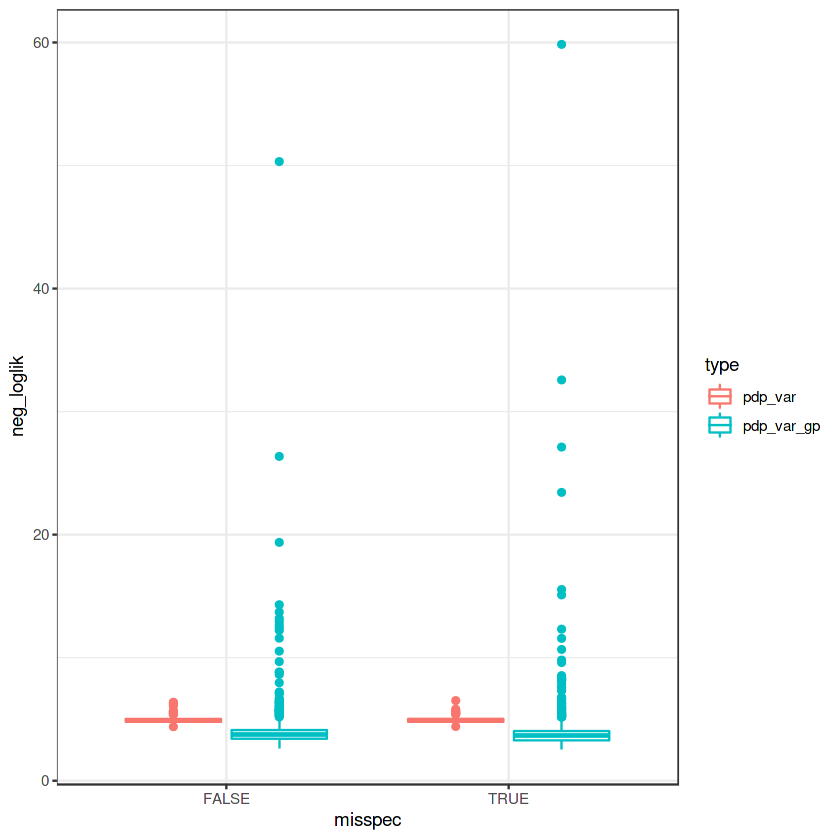

In [66]:
bla_5 = do.call(rbind, out_5)

p = ggplot(data = bla_5, aes(x = misspec, y = neg_loglik, colour = type)) + geom_boxplot() #+ ylim(c(0, 50))
p

In [ ]:
# Create a Table 
bla_5_s = setDT(bla_5)[, .(mean(neg_loglik), sd(neg_loglik)), by = c("misspec", "type", "dimension")]

bla_5_s$variant = paste0(bla_5_s$type, "_", bla_5_s$misspec)
bla_5_s$value = paste0(round(bla_5_s$V1, 2), " (", round(bla_5_s$V2, 2), ")")

reshape2::dcast(bla_5_s, formula = dimension ~ variant, value.var = "value")

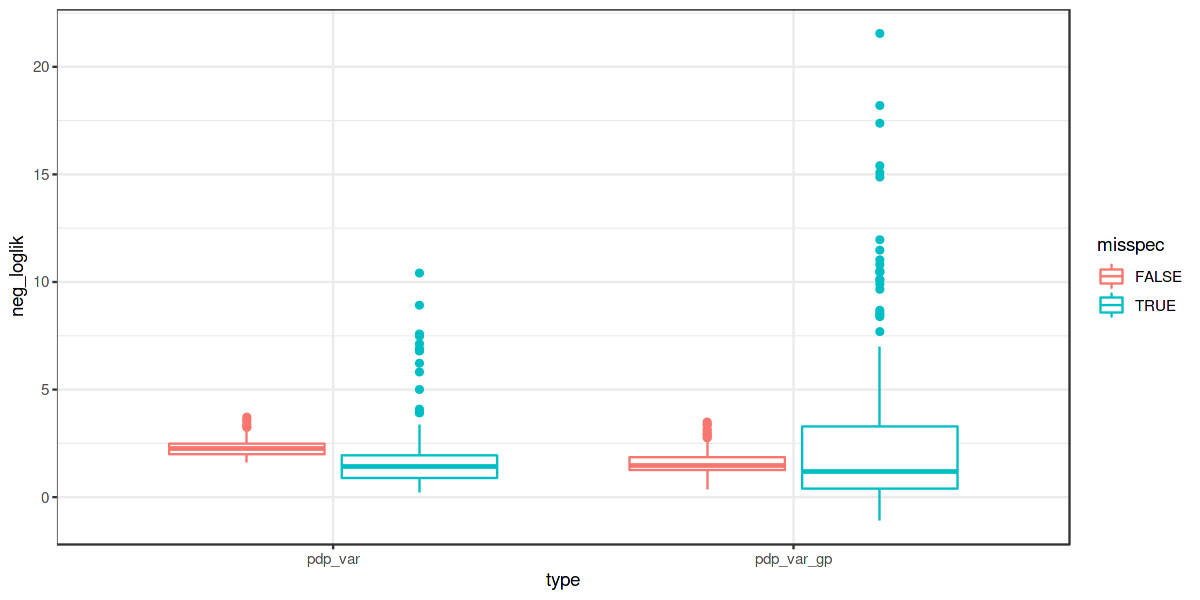

In [583]:
bla = do.call(rbind, out)

p = ggplot(data = bla, aes(x = type, y = neg_loglik, colour = misspec)) + geom_boxplot() #+ ylim(c(0, 50))
p

In [584]:
out = replicate(n = 10, simulate_kernel(dimension = 10, true_kernel = "matern3_2", wrong_kernel = "matern5_2", n = 50, objective = obj), simplify = FALSE)


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 
  - parameters upper bounds :  19.50605 19.70826 
  - best initial criterion value(s) :  -199.1767 

N = 2, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       199.18  |proj g|=      0.59707
At iterate     1  f =       198.62  |proj g|=       0.52747
At iterate     2  f =       193.41  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 3
BFGS updates skipped 0
active bounds at final generalized Cauchy point 2
norm of the final projected gradient 0
final function value 193.415

F = 193.415
final  value 193.414848 
converged

optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical 

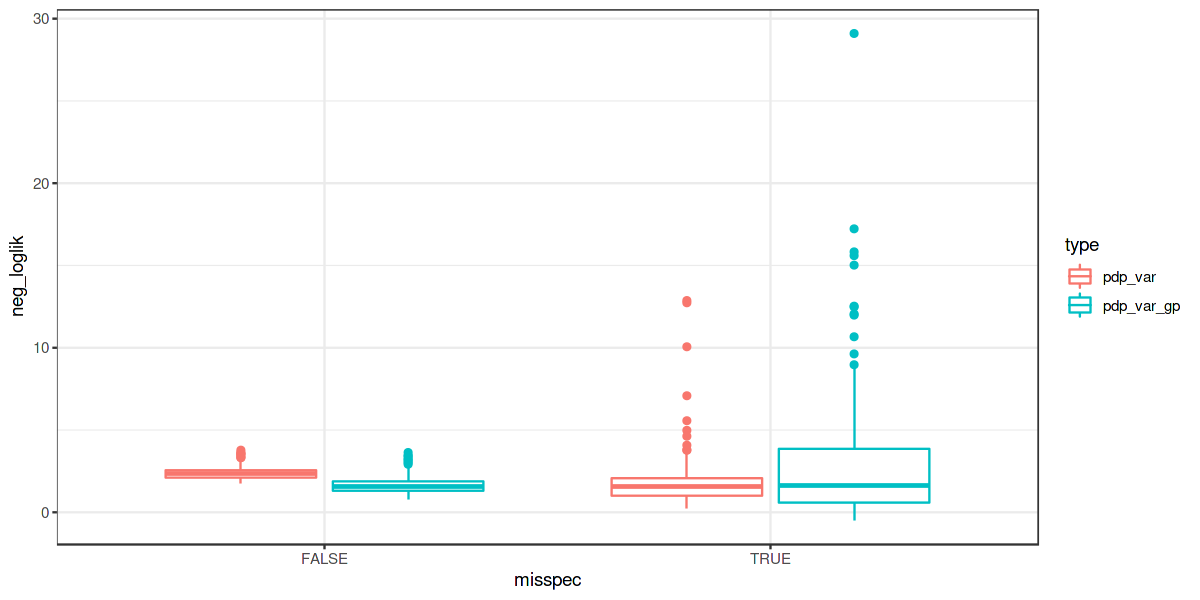

In [586]:
bla = do.call(rbind, out)

p = ggplot(data = bla, aes(x = misspec, y = neg_loglik, colour = type)) + geom_boxplot() #+ ylim(c(0, 50))
p

In [605]:
bla = setDT(bla)

In [608]:
out = bla[, .(mean_negloglik = mean(neg_loglik), sd_negloglik = sd(neg_loglik)), by = c("misspec", "type")]

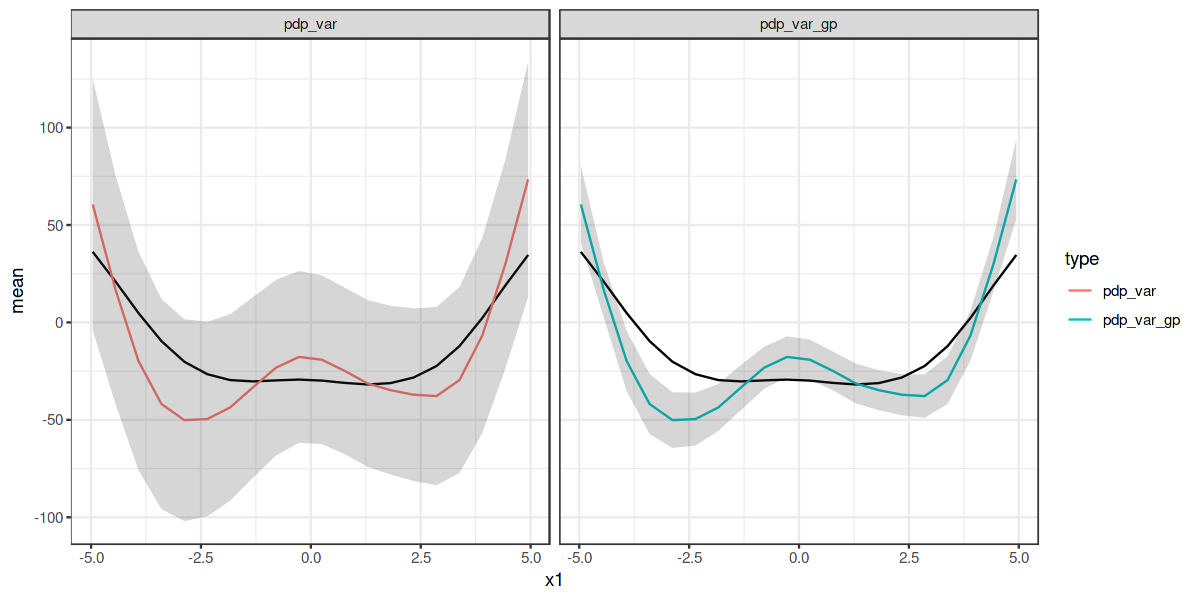

In [541]:
options(repr.plot.width=10, repr.plot.height=5)

p1 = p + geom_line(data = me_pdp1, aes(x = x1, y = mean, colour = type))
p1 = p1 + geom_ribbon(data = me_pdp1, aes(x = x1, ymin = mean - 2 * sd, ymax = mean + 2 * sd), alpha = 0.2)
p1 = p1 + facet_wrap(. ~ type)
p1


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  19.39747 19.92761 19.83641 19.40239 19.15312 
  - best initial criterion value(s) :  -278.5375 

N = 5, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       278.54  |proj g|=           16
At iterate     1  f =       277.88  |proj g|=       0.21775
At iterate     2  f =       277.88  |proj g|=       0.17378
At iterate     3  f =       277.88  |proj g|=       0.17506
At iterate     4  f =       277.88  |proj g|=       0.38435
At iterate     5  f =       277.88  |proj g|=       0.83894
At iterate     6  f =       277.87  |proj g|=        1.5397
At iterate     7  f =       277.85  |proj g|=        2.5905
At iterate     8  f =       277.81 

x1,mean,sd,type,neg_loglik,mean.gt
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
-4.9875543,-3.110099,15.47938,pdp_var_gp,3.807779,-11.56960
-4.4623627,-4.483186,14.90378,pdp_var_gp,3.744703,-11.90968
-3.9371710,-5.694552,14.37867,pdp_var_gp,3.685955,-12.16560
-3.4119794,-6.714708,13.91369,pdp_var_gp,3.632234,-12.29486
-2.8867877,-7.531807,13.51179,pdp_var_gp,3.583964,-12.26913
-2.3615961,-8.154609,13.16946,pdp_var_gp,3.542329,-12.12688
-1.8364044,-8.605626,12.87836,pdp_var_gp,3.507823,-11.93097
-1.3112128,-8.910152,12.62791,pdp_var_gp,3.479854,-11.73420
-0.7860211,-9.088375,12.40815,pdp_var_gp,3.457257,-11.56785
